<a href="https://colab.research.google.com/github/BahrulMunirF/Week3/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


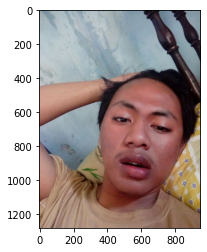

In [13]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np 

img = cv.imread('/content/drive/MyDrive/Google Drive/jelek.jpg')
image = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(image)

**TRANSFORMASI LINIER BRIGHTNESS**

In [ ]:
print(' Mengubah tingkat kecerahan citra')
print('---------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Google Drive/jelek.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

**TUGAS PRAKTIKUM**

1. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran
seperti berikut:

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan nilai kecerahan [-255 - 255]: 60
Masukkan kontras [1.0 - 3.0]: 1.5


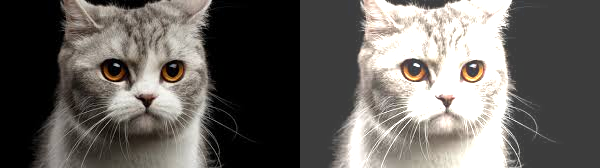

In [6]:
# nomor 1
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------------------')
try :
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')


original = cv.imread('/content/drive/MyDrive/Google Drive/jelek.jpg')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)


final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

2. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukkan nilai kecerahan: 40


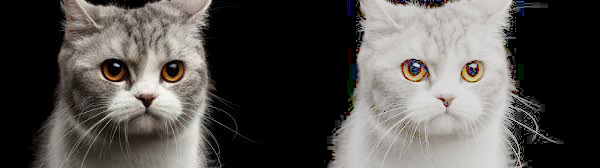

In [7]:
# nomor 2
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Google Drive/kucing.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness * (np.log(1 + original[y,x,c])), 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

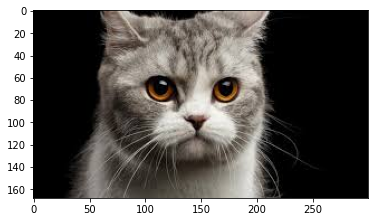

In [8]:
# nomor 3
img_m = cv.imread('/content/drive/MyDrive/Google Drive/kucing.jpg')
img_rgb = cv.cvtColor(img_m,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

averaging

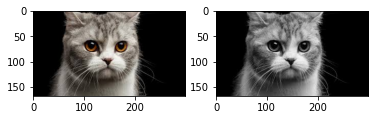

In [9]:
# nomor 3
img_avg = cv.imread('/content/drive/MyDrive/Google Drive/kucing.jpg')
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)

lightness

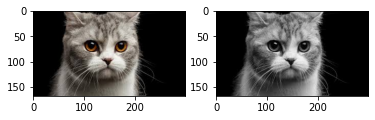

In [10]:
# nomor 3
img_light = cv.imread('/content/drive/MyDrive/Google Drive/kucing.jpg')
img_light[:] = np.max(img_light,axis=-1,keepdims=10)/2+np.min(img_light,axis=-1,keepdims=10)/2
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_light)

luminance

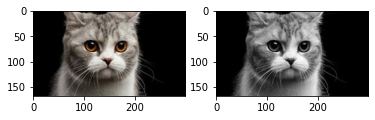

In [11]:
# nomor 3
image_lum = cv.imread('/content/drive/MyDrive/Google Drive/kucing.jpg')
R, G, B = image_lum[:,:,0], image_lum[:,:,1], image_lum[:,:,2]
gray_image_lum = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_image_lum, cmap='gray')

4. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna merah pada citra masukan dan ubah bagian lain yang tidak berwarna
merah menjadi grayscale seperti pada contoh berikut:

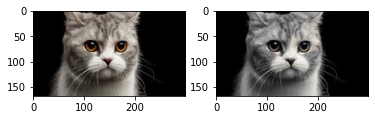

In [12]:
# nomor 4
img_4 = cv.imread('/content/drive/MyDrive/Google Drive/kucing.jpg')
ret, mask = cv.threshold(img_4[:,:,2], 180, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(img_4)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(img_rgb, mask3)

gray = cv.cvtColor(img_4, cv.COLOR_BGR2GRAY)
img_4 = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(img_4, 255 - mask3)

out = gray + red

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(out, cmap='gray')